In [1]:
!pip install --upgrade numpy gensim --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


# Import các thư viện cần thiết


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Word2Vec

## Load Pre-trained Embedding

In [2]:
import gensim.downloader as api

In [ ]:
w2v = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Word embedding
print(w2v['dog'])

[ 5.12695312e-02 -2.23388672e-02 -1.72851562e-01  1.61132812e-01
 -8.44726562e-02  5.73730469e-02  5.85937500e-02 -8.25195312e-02
 -1.53808594e-02 -6.34765625e-02  1.79687500e-01 -4.23828125e-01
 -2.25830078e-02 -1.66015625e-01 -2.51464844e-02  1.07421875e-01
 -1.99218750e-01  1.59179688e-01 -1.87500000e-01 -1.20117188e-01
  1.55273438e-01 -9.91210938e-02  1.42578125e-01 -1.64062500e-01
 -8.93554688e-02  2.00195312e-01 -1.49414062e-01  3.20312500e-01
  3.28125000e-01  2.44140625e-02 -9.71679688e-02 -8.20312500e-02
 -3.63769531e-02 -8.59375000e-02 -9.86328125e-02  7.78198242e-03
 -1.34277344e-02  5.27343750e-02  1.48437500e-01  3.33984375e-01
  1.66015625e-02 -2.12890625e-01 -1.50756836e-02  5.24902344e-02
 -1.07421875e-01 -8.88671875e-02  2.49023438e-01 -7.03125000e-02
 -1.59912109e-02  7.56835938e-02 -7.03125000e-02  1.19140625e-01
  2.29492188e-01  1.41601562e-02  1.15234375e-01  7.50732422e-03
  2.75390625e-01 -2.44140625e-01  2.96875000e-01  3.49121094e-02
  2.42187500e-01  1.35742

In [ ]:
words = ['king', 'queen', 'river', 'water', 'ocean', 'tree', 'leaf', 'happy', 'glad', 'mother', 'daughter']

In [ ]:
word2vec = []
for word in words:
    try:
        word2vec.append(w2v[word])
    except:
        pass
print("There are %d words and the vector size of each word is %d" %(len(word2vec),len(word2vec[0])))

There are 11 words and the vector size of each word is 300


## Tính độ tương đồng cosine_similarity


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(vec1, vec2):
  vec1 = vec1.reshape(1, -1)
  vec2 = vec2.reshape(1, -1)
  return cosine_similarity(vec1, vec2)[0][0]

In [ ]:
w2v_similarity = []

for i, word_1 in enumerate(words):
    w2v_row_wise_simiarity = []
    for j, word_2 in enumerate(words):
        vec_1, vec_2 = w2v[word_1], w2v[word_2]

        # Tính cosine_sim
        similarity = cosine_sim(vec_1,vec_2)
        w2v_row_wise_simiarity.append(np.array(similarity).item())

    w2v_similarity.append(w2v_row_wise_simiarity)

pd.DataFrame(w2v_similarity, columns = words, index = words)

,king,queen,river,water,ocean,tree,leaf,happy,glad,mother,daughter
king,1.000000,0.651096,0.086155,0.035606,0.065263,0.109141,0.094281,0.113239,0.063524,0.160052,0.148813
queen,0.651096,1.000000,0.103566,0.018264,0.099157,0.112222,0.155300,0.121214,0.082538,0.288445,0.305139
river,0.086155,0.103566,1.000000,0.576898,0.477181,0.230746,0.138517,0.073289,0.071341,0.131063,0.116944
water,0.035606,0.018264,0.576898,1.000000,0.471691,0.196022,0.173613,0.067675,0.085623,0.110723,0.079457
ocean,0.065263,0.099157,0.477181,0.471691,1.000000,0.141859,0.080042,-0.000511,0.014122,0.105623,0.081207
tree,0.109141,0.112222,0.230746,0.196022,0.141859,1.000000,0.482285,0.076933,0.105760,0.188985,0.173518
leaf,0.094281,0.155300,0.138517,0.173613,0.080042,0.482285,1.000000,0.064716,0.060144,0.076172,0.062331
happy,0.113239,0.121214,0.073289,0.067675,-0.000511,0.076933,0.064716,1.000000,0.740889,0.119672,0.152536
glad,0.063524,0.082538,0.071341,0.085623,0.014122,0.105760,0.060144,0.740889,1.000000,0.125566,0.181102
mother,0.160052,0.288445,0.131063,0.110723,0.105623,0.188985,0.076172,0.119672,0.125566,1.000000,0.870623


## Visualize biểu đồ heatmap

<Axes: >

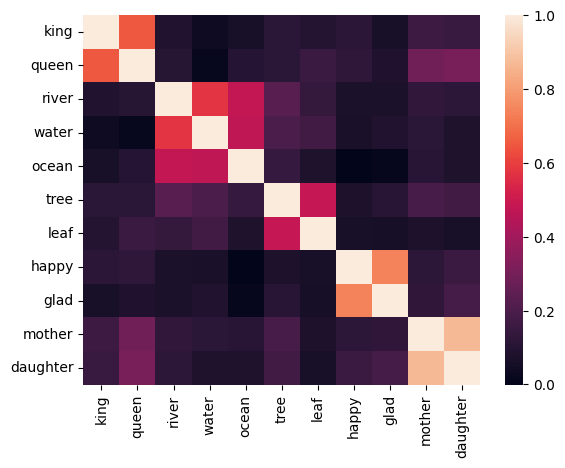

In [ ]:
sns.heatmap(pd.DataFrame(w2v_similarity, columns = words, index = words))

=> ***Higher the cosine similarity, the words are more closer***

## Visualize 2D bằng PCA

In [ ]:
pca = PCA(n_components=2)

reduced_w2v = pca.fit_transform(word2vec)

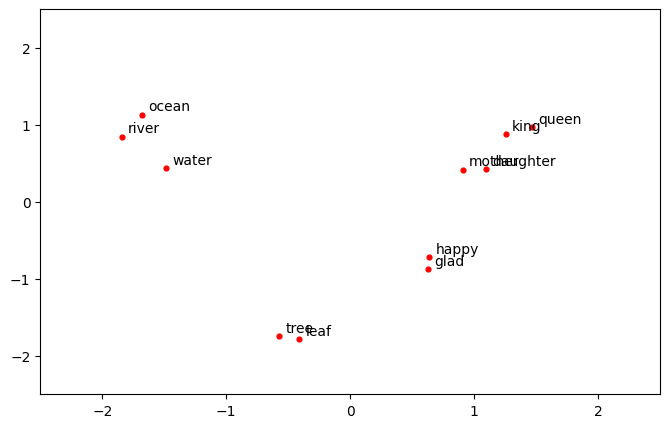

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(reduced_w2v[:,0],reduced_w2v[:,1], s = 12, color = 'red')
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
x, y = reduced_w2v[:,0] , reduced_w2v[:,1]
for i in range(len(x)):
    plt.annotate(words[i],xy=(x[i], y[i]),xytext=(x[i]+0.05,y[i]+0.05))

# GloVe



## Load Pre-trained Embedding

In [ ]:
glove = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
print(glove["dog"])

[ 0.11008   -0.38781   -0.57615   -0.27714    0.70521    0.53994
 -1.0786    -0.40146    1.1504    -0.5678     0.0038977  0.52878
  0.64561    0.47262    0.48549   -0.18407    0.1801     0.91397
 -1.1979    -0.5778    -0.37985    0.33606    0.772      0.75555
  0.45506   -1.7671    -1.0503     0.42566    0.41893   -0.68327
  1.5673     0.27685   -0.61708    0.64638   -0.076996   0.37118
  0.1308    -0.45137    0.25398   -0.74392   -0.086199   0.24068
 -0.64819    0.83549    1.2502    -0.51379    0.04224   -0.88118
  0.7158     0.38519  ]


In [ ]:
words = [
    'doctor', 'patient',
    'teacher', 'student', 'school',
    'king', 'queen', 'palace',
    'dog', 'animal', 'pet'
]

In [ ]:
# Vector representation of each word using GloVe
vectors = []
for word in words:
    try:
        vector = glove[word]
        vectors.append(vector)
    except:
        pass
print("There are %d words and the vector size of each word is %d" %((len(vectors),len(vectors[0]))))

There are 11 words and the vector size of each word is 50


## Tính độ tương đồng cosine_similarity

In [ ]:
### YOUR CODE HERE ###

### YOUR CODE HERE ###

## Visualize biểu đồ heatmap

<Axes: >

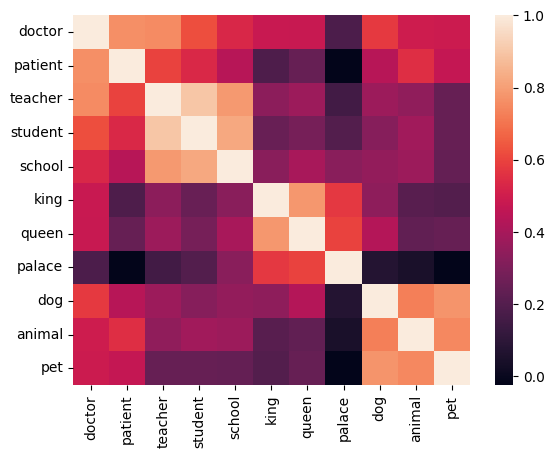

In [ ]:
sns.heatmap(pd.DataFrame(word_similarity, columns=words, index=words))

GloVe derives the semantic relationship between the words. Higher the cosine similarity, the words are relatively closer

## Visualize 2D bằng PCA

In [ ]:
pca = PCA(n_components=2)

reduced_vectors = pca.fit_transform(vectors)

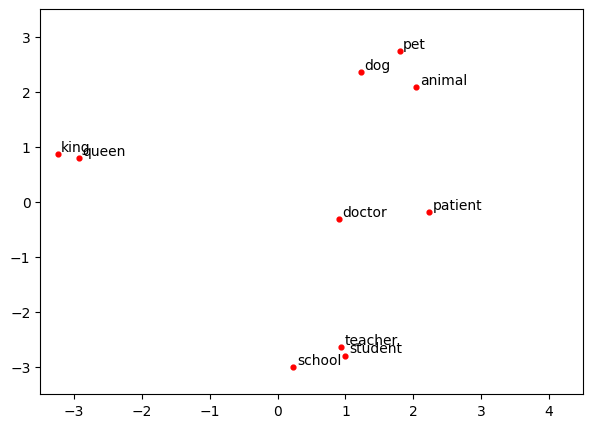

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1], s = 12, color = 'red')
plt.xlim([-3.5,4.5])
plt.ylim([-3.5,3.5])
x, y = reduced_vectors[:,0] , reduced_vectors[:,1]
for i in range(len(x)):
    plt.annotate(words[i],xy=(x[i], y[i]),xytext=(x[i]+0.05,y[i]+0.05))

# Sentence Embedding

In [ ]:
def get_sentence_embedding(sentence, model):
    ### YOUR CODE HERE ###

    ### YOUR CODE HERE ###

# Example sentence
sentence = "Artificial intelligence will rule the world."
embedding = get_sentence_embedding(sentence, w2v)
print(embedding)

In [ ]:
def cosine_sim(vec1, vec2):
    ### YOUR CODE HERE ###

    ### YOUR CODE HERE ###

In [ ]:
sentences = [
    "Cat will rule the world.",
    "Animal will destroy human",
    "The weather is lovely today.",
]
# Cosine similarity
for i in range(len(sentences)):
  embedding1 = get_sentence_embedding(sentences[i], w2v)
  for j in range(i+1, len(sentences)):
    embedding2 = get_sentence_embedding(sentences[j], w2v)
    similarity = cosine_sim(embedding1, embedding2)
    print(f"Cosine Similarity between sentence {i} and sentence {j}: {similarity}")

Cosine Similarity between sentence 0 and sentence 1: 0.5059559941291809
Cosine Similarity between sentence 0 and sentence 2: 0.3433777987957001
Cosine Similarity between sentence 1 and sentence 2: 0.20736929774284363


## Problem

In [ ]:
sentences = [
    "The movie was thrilling and suspenseful.",
    "I felt tense and anxious during the film.",
    "The book was boring and uneventful.",
]
# Cosine similarity
for i in range(len(sentences)):
  embedding1 = get_sentence_embedding(sentences[i], w2v)
  for j in range(i+1, len(sentences)):
    embedding2 = get_sentence_embedding(sentences[j], w2v)
    similarity = cosine_sim(embedding1, embedding2)
    print(f"Cosine Similarity between sentence {i} and sentence {j}: {similarity}")

Cosine Similarity between sentence 0 and sentence 1: 0.49398937821388245
Cosine Similarity between sentence 0 and sentence 2: 0.6155940890312195
Cosine Similarity between sentence 1 and sentence 2: 0.45402878522872925
